do you have trouble finding skincare products that work for you?

run the cells below to get new product recommendations similar to what you already love.

In [1]:
#load all the important stuff
import difflib
import numpy as np
import pandas as pd
from difflib import SequenceMatcher

from IPython.display import Image
import requests
import IPython.display as Disp

#load product database
product_file='ulta.csv'
product_db=pd.read_csv(product_file)

#combine brand + product name
brand_plus_name=[product_db['brand'].loc[i]+' '+product_db['name'].loc[i] for i in range(0,len(product_db))]
product_db['name']=brand_plus_name

please enter a product name below:
cerave

product not found, did you mean:

     cerave travel size foaming facial cleanser
     cerave travel size daily moisturizing cream
     cerave travel size daily moisturizing lotion
     cerave travel size hydrating facial cleanser

please re-enter your query below:
cerave travel size daily moisturizing lotion

product found!

your chosen product: cerave travel size daily moisturizing lotion (Price$5.49)

ingredients:
Purified Water, Glycerin, Caprylic/Capric Triglyceride, Behentrimonium Methosulfate and Cetearyl Alcohol, Ceteareth-20 and Cetearyl alcohol, Cetyl Alcohol, Polyglyceryl-3-Diisosterate, Dimethicone, Hyaluronic Acid, Ceramide 1, Ceramide 3, Ceramide 6-II, Cholesterol, Phytosphingosine, Potassium Phosphate, Dipotassium phosphate, Methylparaben, Propylparaben, Disodium EDTA, Sodium Lauroyl Lactylate, Polysorbate 20, Carbomer, Xanthan Gum.



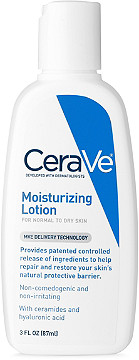

In [4]:
#user inputs product name
print 'please enter a product name below:'
nameA=raw_input()
nameA=nameA.lower()
print ''

name_list=[str(product_db['name'].loc[i]).lower() for i in range(0,len(product_db))]

#if product not found, suggest similar product names, ask user to re-enter input
if(nameA not in name_list):
    
    #loop until a valid name is entered
    match=False
    while(match==False):
        
        #suggestions for similar product names
        possible_matches=difflib.get_close_matches(nameA,name_list)
        contains=[name_list[i] for i in range(0,len(name_list)) if nameA in name_list[i]]
        
        if((len(possible_matches)>0) or (len(contains)>0)):
            print 'product not found, did you mean:'.format()
            for name in possible_matches:
                print '     {}'.format(name)
            print ''
            for name in contains:
                print '     {}'.format(name)
        else:
            print 'sorry, no matching products found'
            
        print ''
        print 'please re-enter your query below:'
        nameA=raw_input()
        if(nameA in name_list):
            print '\nproduct found!\n'
            match=True
            
name_list=np.asarray(name_list)
indexA = np.where(name_list==nameA)[0][0]
            
print 'your chosen product: {} ({})\n'.format(nameA,product_db['price'].loc[indexA])
print 'ingredients:'
print product_db['ingredients'].loc[indexA]

print ''
url=product_db['image-src'].loc[indexA]
Disp.Image(requests.get(url).content,width=100,height=100)

searching for products similar to cerave travel size daily moisturizing lotion...

best match: cerave travel size foaming facial cleanser ()
19 shared ingredients

cerave travel size foaming facial cleanser ingredients:
Purified Water, Glycerin, Behentrimonium Methosulfate and Cetearyl Alcohol, Ceramide 3, Ceramide 6-II, Ceramide 1, Hyaluronic Acid, Cholesterol, Polyoxyl 40 Stearate, Glyceryl Monostearate, Stearyl Alcohol, Polysorbate 20, Potassium Phosphate, Dipotassium Phosphate, Sodium Lauroyl Lactylate, Cetyl Alcohol, Disodium EDTA, Phytosphingosine, Methylparaben, Propylparaben, Carbomer, Xanthan Gum.



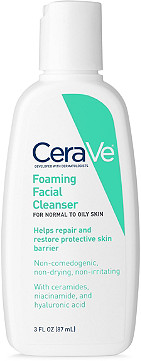

In [6]:
#find most similar product, based on ingredients

#format ingredients list
try:
    listA = product_db['ingredients'].loc[indexA].split(', ')
except:
    listA=['']
    
listA=[ingr.lower() for ingr in listA]

max_shared=0
match_index=None

print 'searching for products similar to {}...\n'.format(nameA)

for i in range(0,len(product_db)):
    nameB=name_list[i]
    
    #format ingredients list
    try:
        listB = product_db['ingredients'].loc[i].split(', ')
    except:
        listB=['']
        
    listB=[ingr.lower() for ingr in listB]
        
    shared=(set(listA) & set(listB))
    num_shared=len(shared)
    
    #store product with most ingredient matches
    if((num_shared>max_shared) and (nameA!=nameB)):
        max_shared=num_shared
        match_index=i
        
#print results
if(match_index!=None):
    print 'best match: {} ()'.format(name_list[match_index],product_db['price'].loc[match_index])
    print '{} shared ingredients'.format(max_shared)

    print ''
    print '{} ingredients:'.format(name_list[match_index])
    print product_db['ingredients'].loc[match_index]
    print ''
else:
    print 'no matches found'
    
url=product_db['image-src'].loc[match_index]
Disp.Image(requests.get(url).content,width=100,height=100)